# Part II - Ford Go Bike Explanatory

### Garrett Peters

## Investigation Overview

**Who is most commonly using the Ford Go Bike Renting System?**

We will explore

- **Day-of-Week Trends** – Understand the busier days for bike rentals

- **Time-of-Day Trends** – Understanding the busiest times for bike rentals

- **Age-Duration Relationship Patterns** – Analyzing which age groups rent bikes most frequently and the average duration of their trips

- **Customer vs. Subscriber Behavior** – How different user groups  behave differently in terms of trip duration

## Dataset Overview and Executive Summary

This cleaned Ford GoBike dataset contains information about individual bike rides in the Ford GoBike bike sharing system. The system allows users to rent bikes from designated docking stations across the greater San Francisco Bay Area. This dataset includes 175,147 bike rentals throughout February 2019. It includes attributes about each ride and unique characteristics to each customer. Variables and Descriciptions can be read below: 

1. **duration_min**: Numeric variable representing the duration of the bike trip in minutes.
2. **user_type**: Categorical variable indicating whether the user is a member or a non-member.
3. **member_gender**: Categorical variable indicating the gender of the bike rider.
4. **rounded_time**: Numeric variable representing the time of day rounded to the nearest 20th minute.
5. **member_age**: Numeric variable representing the approximate age of the rider, based on their birth year and the base year of 2019.
6. **day_of_week**: Categorical variable representing the day the bike was rented


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
Rentals = pd.read_csv('Final_Rentals.csv')

## Day-of-Week Trends

The frequency plot below shows the number of bike rentals throughout the week. This graph helps us identify the busiest and slowest times of week, giving insight into when most popular to rent a bike.

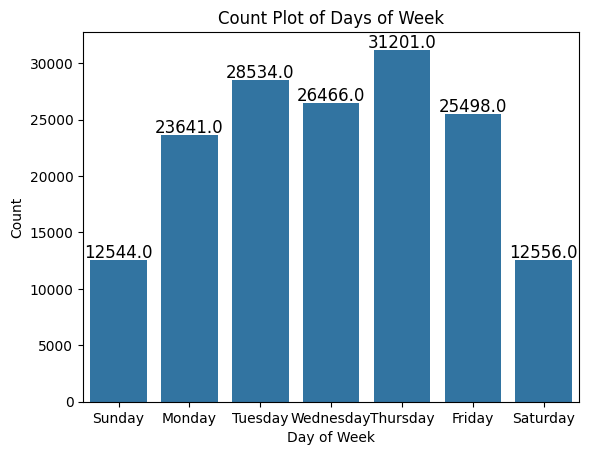

In [3]:
#Create Order for clarity
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Create the count plot with the specified order of days
ax = sns.countplot(x='day_of_week', data=Rentals, order=day_order)

# Add frequency labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5),  # Adjust position to avoid overlapping with bars
                textcoords='offset points')

# Add labels and title
plt.title('Count Plot of Days of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')

# Show the plot
plt.show()

As seen in the plot above, weekend rentals (Sunday and Saturday) are significantly lower than those on weekdays. Weekdays consistently generate at least 11,000 more rentals across each cumulative day throughout the month. The most popular day is Thursday, with more than 18,000 total rentals across all Thursdays in the month, compared to Sunday, which has the fewest rentals.

## Time-of-Day Trends

The frequency plot below shows the number of bike rentals throughout the day. The time is rounded to the nearest 30-minute interval, indicating how many bikes were rented within each half-hour period. This graph helps us identify the busiest and slowest times of day, giving insight into when it’s easiest or hardest to rent a bike.

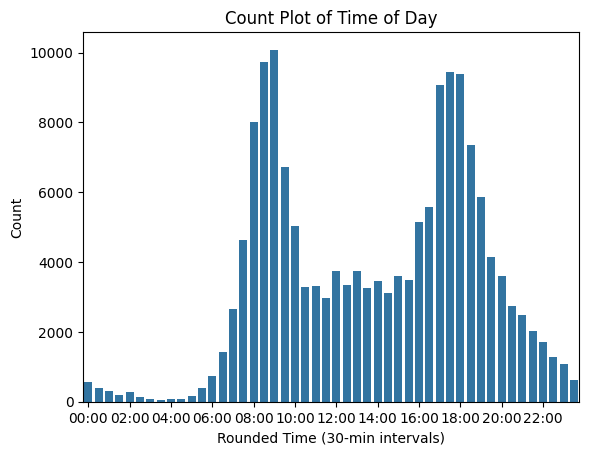

In [4]:
# Create the count plot
ax = sns.countplot(x='rounded_time', data=Rentals, order=sorted(Rentals['rounded_time'].unique()))

# Get the current x-ticks and labels
ticks = ax.get_xticks()
labels = ax.get_xticklabels()

# Show every 4th tick to avoid overcrowding
plt.xticks(ticks[::4], labels[::4])

# Add labels and title
plt.title('Count Plot of Time of Day')
plt.xlabel('Rounded Time (30-min intervals)')
plt.ylabel('Count')

# Show the plot
plt.show()

We can observe that overnight activity is minimal, with a significant increase in rentals between 6:00 AM and 9:30 AM, peaking just under 10,000 rentals during that half-hour. Afterward, activity gradually decreases, stabilizing around 4,000 rentals from 11:00 AM to 3:30 PM. At 4:00 PM, rentals start to rise again, reaching about 9,500 by 6:00 PM. Following that, activity drops gradually to about 3,000 rentals in the evening, and by 11:00 PM, it falls to under 2,000 rentals as nighttime settles in.

## Age-Duration Relationship Patterns
The heatmap below visualizes the most frequent ages of users, with density represented by color intensity. The darker the blue, the higher the density of users in that specific age group at a given trip duration. This allows us to identify patterns in user behavior, such as which age groups are most frequent, as well as how long their trips tend to be. By analyzing this data, we can gain insights into the predominant customer segments and how far or short their typical bike rides are. This information helps in understanding customer preferences and targeting specific demographics for future improvements.

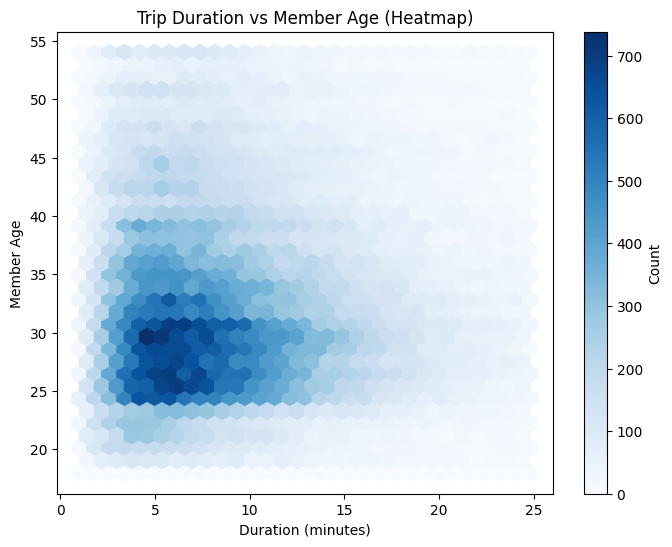

In [5]:
# Identify Q1 and Q3 for member_age
Q1_age = Rentals['member_age'].quantile(0.25)
Q3_age = Rentals['member_age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

# Define the outlier thresholds (1.5 * IQR rule) for member_age
lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age

Rentals = Rentals[(Rentals['member_age'] >= lower_bound_age) & (Rentals['member_age'] <= upper_bound_age)]

plt.figure(figsize=(8, 6))
plt.hexbin(Rentals['duration_min'], Rentals['member_age'], gridsize=30, cmap='Blues')  # smaller grid size
plt.colorbar(label='Count')
plt.title('Trip Duration vs Member Age (Heatmap)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Member Age')
plt.show()

By focusing on the darker blue areas of the heatmap, we can see that the majority of bike rentals are made by users aged 25 to 30 years old. These users typically take trips lasting between 4 and 10 minutes.

## Customer vs. Subscriber Behavior

The boxplot below groups users by gender within each user type (either 'Customer' or 'Subscriber') and visualizes the summary statistics of their ride durations. By analyzing the boxplot, we can identify patterns, such as differences in ride duration between genders or user types. Additionally, the table below provides the count, mean duration, mean age, and median age for each user type. This information helps further identify key user segments and target groups for tailored marketing or system improvements.

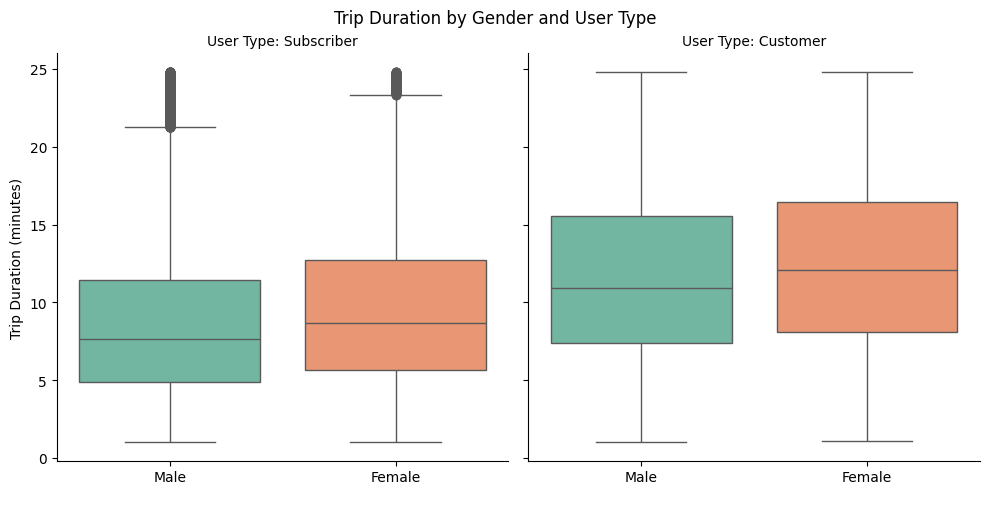

In [6]:
# Create a FacetGrid to facet by 'user_type' and plot boxplot of 'duration_min' by 'Gender'
g = sns.FacetGrid(Rentals, col="user_type", height=5)
g.map(sns.boxplot, "member_gender", "duration_min", order=['Male', 'Female'], palette='Set2')

# Add labels and title
g.set_axis_labels(' ', 'Trip Duration (minutes)')
g.set_titles("User Type: {col_name}")
plt.suptitle('Trip Duration by Gender and User Type', y=1.02)
plt.show()

In [7]:
user_type_stats = Rentals.groupby('user_type').agg(
    count=('user_type', 'size'),
    mean_duration=('duration_min', 'mean'),
    mean_age=('member_age', 'mean'),
    median_age = ('member_age', 'median')
).reset_index()

# Display the result
print(user_type_stats)

    user_type   count  mean_duration   mean_age  median_age
0    Customer   13168      11.931213  32.674666        32.0
1  Subscriber  144299       8.897696  32.750400        31.0


From the plot and table above, we observe that subscribers tend to have a shorter mean rental duration compared to customers. Additionally, there are 130,000 more subscribers than customers, which highlights the larger user base for the subscription model. Interestingly, females have a longer average rental duration than males, indicating a potential behavioral difference between genders. The table also provides the average age for both subscribers and customers, offering further insights into the demographics of each user type.

### Investigation Conclusion
**Who is most commonly using the Ford Go Bike Renting System?**

Based on the visualizations above, it can be hypothesized that the typical user of the Ford Go Bike Renting System is a young, working professional residing in the Greater San Francisco area. This is supported by the data showing that the busiest days are weekdays, particularly Monday through Friday. The peak usage times coincide with the start and end of typical workdays, suggesting that many users rely on the system for commuting purposes.

Additionally, the most frequent age group of users is between 25 and 30 years old, with rentals typically lasting for a short duration. The majority of users are subscribers, further indicating that regular, committed users dominate the system. This suggests that the Ford Go Bike Renting System is most popular among individuals with steady work schedules who are looking for a convenient, quick, and affordable transportation option.